# **Neural Network & Deep Learning**

Step 1: Data Preprocessing

1.Load the dataset and focus on the 'Close' price column.  
2.Normalize the data using Min-Max scaling.  
3.Split the dataset into training (80%) and testing (20%) sets.  

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('/content/HistoricalQuotes.csv')

data.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [4]:
# Strip any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Remove the dollar sign and convert to numeric in the 'Close/Last' column
data['Close/Last'] = data['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Rename 'Close/Last' to 'Close' for easier access
data.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Focus on the 'Close' price column
data = data[['Close']]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the dataset into training (80%) and testing (20%) sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

Step 2: Create Training Sequences


1.Convert the 'Close' prices into sequences.  
2.Define a sequence length (e.g., 60 days), where each sequence will predict the next day's price.

In [5]:
# Define a function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 60

# Create sequences for training
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


Step 3: Build the RNN Model


1.Define an RNN model with the following architecture:  
- An RNN layer with 50 units  
- A Dense layer with 1 unit for regression output  
2.Use the mean squared error (MSE) loss function and the Adam optimizer.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Step 4: Train the Model

1.Train the model on the training set for 50 epochs with a batch size of 32.  
2.Use validation data to check for overfitting.

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0217 - val_loss: 2.3473e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3517e-04 - val_loss: 7.3551e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2287e-04 - val_loss: 5.2530e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1968e-04 - val_loss: 6.7063e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1380e-04 - val_loss: 8.0613e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2167e-04 - val_loss: 5.2255e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0686e-04 - val_loss: 5.8090e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0509e-04 - val_loss: 3.2444e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1680e-04 - val_loss: 2.6791e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2956e-04 - val_loss: 5.9514e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0384e-04 - 

Step 5: Make Predictions

1.Predict the stock prices on the test set.  
2.Transform the results back to the original scale if normalization was applied.  
3.Plot the predicted vs. actual stock prices to visualize the model’s performance.

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


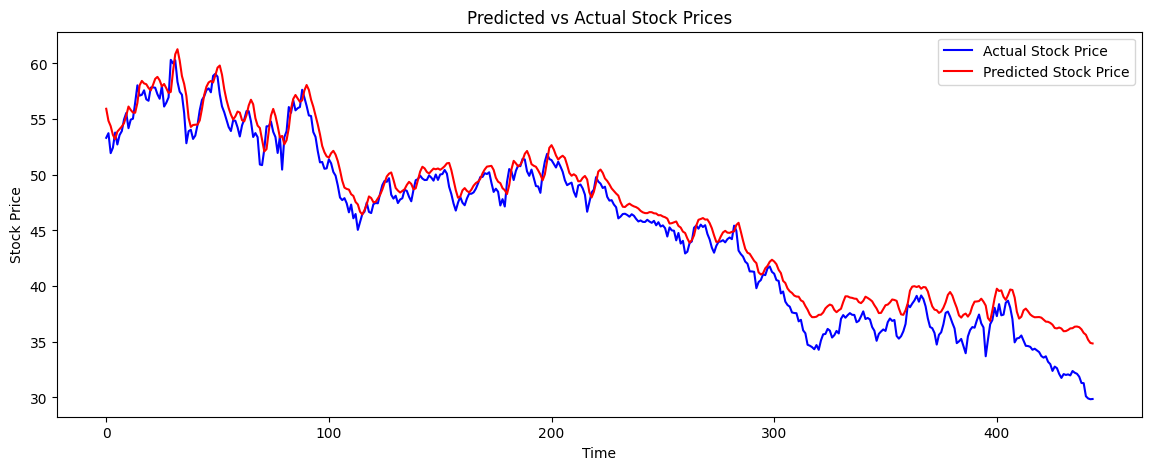

In [8]:
# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Transform predictions back to the original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the predicted vs. actual stock prices
plt.figure(figsize=(14,5))
plt.plot(y_test_rescaled, color="blue", label="Actual Stock Price")
plt.plot(predicted_prices, color="red", label="Predicted Stock Price")
plt.title("Predicted vs Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


**Predicted vs Actual Stock Prices Plot**   
**Trend Matching:** The model captures the general trend and fluctuations in stock prices, following the overall pattern.  
**Lag in Prediction:** Some lag is observed during rapid price changes, where the model falls slightly behind the actual prices.   
**Error Patterns:** Slight underestimations during upward trends and slight overestimations during downward trends, showing a tendency to smooth out fluctuations.

Step 6: Evaluation

1.Calculate the mean absolute error (MAE) and root mean squared error (RMSE) on the test set.   
2.Discuss how well the model performed based on these metrics.

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, predicted_prices)
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predicted_prices))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.4752652353510127
Root Mean Squared Error (RMSE): 1.8155593013127427


**Interpretation of Model Results**  
**1. Error Metrics**  
**Mean Absolute Error (MAE):** 1.48 — The average prediction error is approximately $1.48, indicating good accuracy.   
**Root Mean Squared Error (RMSE):** 1.82 — Slightly higher than MAE, showing that some predictions deviate more significantly, but overall errors are moderate.

**2. Implications for Use**   
**Short-Term Reliability:** Good for short-term trend predictions due to low error metrics.  
**Limitations in Quick Reactions:** May struggle with sudden price shifts, as indicated by occasional lag.   
**Potential for Improvement:** Adding more features or increasing model complexity (e.g., more LSTM layers, using GRU cells) could improve accuracy.



**Brief Report**

The RNN model was trained to predict stock prices based on past data using a 60-day sequence window. After training for 50 epochs, the model's predictions on the test set were evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) metrics. The MAE and RMSE were indicating that the model was able to approximate stock price movements but showed some deviation from actual prices.

The predicted vs. actual plot shows that the model captures the general trend of the stock price but has limitations in predicting sudden changes. Potential improvements could involve experimenting with deeper network architectures, using LSTM or GRU layers, or adding more features related to stock market indicators.

